In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "E:/Users/Elliott/dev/aquavision_project/AquaVision Image Data/Research Data"
CATEGORIES = ['Clean', 'Contaminated']

# for num, img in enumerate(os.listdir(DATADIR), start=1):
#     img_array = cv2.imread(os.path.join(DATADIR, img))
#     plt.imshow(img_array, cmap='Accent')
#     plt.show()
#     break


training_data = []
IMG_SIZE = 300

def create_training_dataset():
    for num, img in enumerate(os.listdir(DATADIR), start=1):
        try:
            img_arr = cv2.imread(os.path.join(DATADIR, img))
            RGB_ver = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            new_img_arr = cv2.resize(RGB_ver, (IMG_SIZE, IMG_SIZE))
            if(num == 1):
                plt.imshow(new_img_arr)
                plt.show()
            if(num <= 35):
                # Second parameter is class num 0 for clean
                training_data.append([new_img_arr, 0])
                print("Added img num {} as clean".format(num))
            elif(num >= 35 and num <= 91):
                # Second parameter is class num 1 for dirty
                training_data.append([new_img_arr, 1])
                print("Added img num {} as contaminated".format(num))
            else:
                # There are 15 additional clean images
                training_data.append([new_img_arr, 0])
                print("Added img num {} as clean".format(num))
        except Exception as e:
            print(e)

#  Run function to create our training data
create_training_dataset()
print(len(training_data))


<Figure size 640x480 with 1 Axes>

Added img num 1 as clean
Added img num 2 as clean
Added img num 3 as clean
Added img num 4 as clean
Added img num 5 as clean
Added img num 6 as clean
Added img num 7 as clean
Added img num 8 as clean
Added img num 9 as clean
Added img num 10 as clean
Added img num 11 as clean
Added img num 12 as clean
Added img num 13 as clean
Added img num 14 as clean
Added img num 15 as clean
Added img num 16 as clean
Added img num 17 as clean
Added img num 18 as clean
Added img num 19 as clean
Added img num 20 as clean
Added img num 21 as clean
Added img num 22 as clean
Added img num 23 as clean
Added img num 24 as clean
Added img num 25 as clean
Added img num 26 as clean
Added img num 27 as clean
Added img num 28 as clean
Added img num 29 as clean
Added img num 30 as clean
Added img num 31 as clean
Added img num 32 as clean
Added img num 33 as clean
Added img num 34 as clean
Added img num 35 as clean
Added img num 36 as contaminated
Added img num 37 as contaminated
Added img num 38 as contaminated


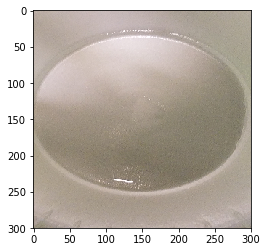

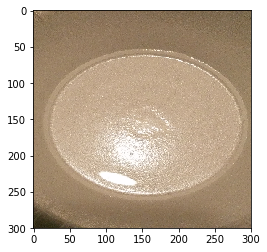

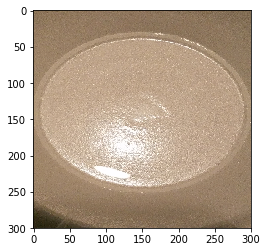

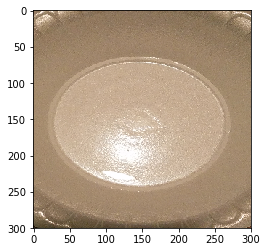

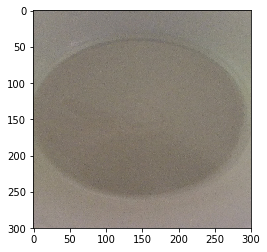

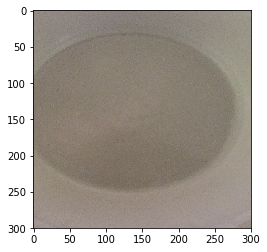

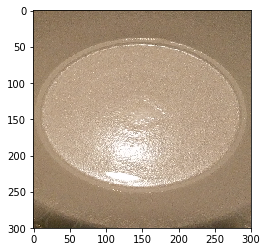

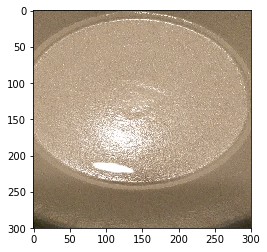

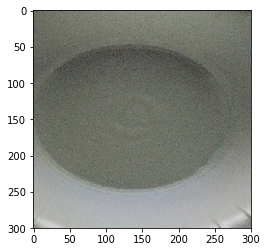

In [4]:
for k in range(91, 100):
    plt.imshow(training_data[k][0])
    plt.show()
# print(len(training_data[1][0]))


In [5]:
# Randomize the data so that it is not in order of clean-then-contaiminated
# If not randomized, could potentially cause issues with the model
import random
random.shuffle(training_data)
for x in training_data:
    print(x[1])

0
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
1
0
0


In [6]:
# Reformat data using an numpy array to export it using pickle
X_features = [] # Training data
y_labels = [] # Labels/classifiers for the data
for feature, label in training_data:
    X_features.append(feature)
    y_labels.append(label)
    
X_features = np.array(X_features).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # change 1 to a 3 for RGB 
# since there are 3 colors for RGB instead of one
    

In [7]:
import pickle

# Create pickle files for the data/labels
pickle_out = open("X_features.pickle", "wb")
pickle.dump(X_features, pickle_out)
pickle_out.close()

pickle_out = open("y_labels.pickle", "wb")
pickle.dump(y_labels, pickle_out)
pickle_out.close()

In [8]:
pickle_in = open("X_features.pickle", "rb")
X_features = pickle.load(pickle_in)
print(X_features[0])

[[[195 178 159]
  [193 176 156]
  [192 175 155]
  ...
  [196 178 158]
  [195 177 157]
  [196 178 156]]

 [[194 177 159]
  [196 179 161]
  [195 178 158]
  ...
  [194 176 156]
  [195 177 157]
  [192 174 152]]

 [[192 175 157]
  [195 178 160]
  [196 179 159]
  ...
  [193 175 155]
  [195 177 157]
  [194 176 154]]

 ...

 [[ 46  27  17]
  [ 58  40  27]
  [ 84  65  50]
  ...
  [231 213 199]
  [233 215 201]
  [235 218 203]]

 [[ 38  20  16]
  [ 41  22  16]
  [ 46  26  20]
  ...
  [232 215 199]
  [227 209 195]
  [232 214 200]]

 [[ 32  17  14]
  [ 38  20  18]
  [ 41  23  19]
  ...
  [233 216 200]
  [230 213 197]
  [228 211 195]]]


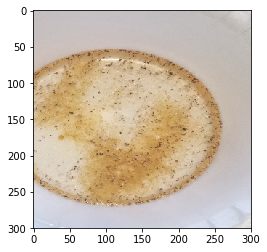

In [17]:
plt.imshow(X_features[1])

In [18]:
print(X_features[1])

[[[196 192 193]
  [197 193 194]
  [195 191 192]
  ...
  [225 220 224]
  [222 217 221]
  [218 213 217]]

 [[196 192 193]
  [197 192 194]
  [194 190 191]
  ...
  [222 218 216]
  [221 216 220]
  [221 216 220]]

 [[195 191 192]
  [195 191 192]
  [194 191 191]
  ...
  [221 217 214]
  [219 215 216]
  [216 212 213]]

 ...

 [[203 220 238]
  [203 220 240]
  [202 219 239]
  ...
  [220 214 216]
  [223 217 219]
  [226 220 222]]

 [[205 222 242]
  [202 219 239]
  [204 221 241]
  ...
  [219 215 216]
  [222 213 216]
  [219 210 213]]

 [[203 221 243]
  [203 221 241]
  [205 222 242]
  ...
  [223 213 217]
  [220 211 214]
  [222 213 216]]]
